In [5]:
import pandas as pd

df_bre = pd.read_csv("Dataset/breast.csv")
df_nor = pd.read_csv("Dataset/normal.csv")

display(df_bre.head(3), df_bre.shape)
display(df_nor.head(3), df_nor.shape)

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,breast,tumoral_basal,10.896695,6.822755,6.208037,8.240948,3.561534,6.565948,5.810279,5.031073,...,12.908356,12.359587,14.098307,14.195651,3.894551,3.898071,3.580795,3.432257,3.724186,3.638622
1,breast,tumoral_basal,9.641718,7.363538,6.256256,8.303424,3.372617,7.079188,5.941050,4.874336,...,12.391813,11.776600,13.674190,13.740015,4.184290,3.840209,3.527928,3.603502,3.917258,3.821375
2,breast,tumoral_basal,9.978563,8.278789,7.669063,8.051921,3.599057,6.611970,5.845036,4.912140,...,11.989426,11.389290,13.668495,13.437867,4.223195,3.869195,3.623235,3.426600,3.892071,3.934255


(259, 54677)

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,normal,11.058354,7.938873,6.606813,8.665940,4.308291,7.267153,6.485517,6.625708,...,12.520958,11.760554,14.033720,13.866105,5.190382,4.625670,3.895986,3.555475,4.529254,4.541289
1,normal,normal,10.891077,8.196186,6.882572,9.763854,6.689535,6.982140,7.144234,5.777428,...,11.863581,10.970631,13.485758,13.257828,5.582483,5.386739,4.043629,3.636652,4.482753,4.371177
2,normal,normal,12.428312,7.860278,7.077833,8.938877,6.967024,7.689809,7.277855,5.515079,...,12.998057,12.408428,14.191433,14.035984,5.632215,4.727816,3.696424,3.625613,4.575635,5.094951


(416, 54677)

In [12]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("Dataset/breast+normal.csv")
df = shuffle(df, random_state=42).reset_index(drop=True)

display(df.head(5))

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,breast,HER,10.497409,7.569389,5.437551,7.411912,3.190743,7.305773,5.304184,4.762072,...,12.607171,12.062943,13.933579,13.763558,7.275929,5.632454,5.802355,2.829433,3.432319,3.178773
1,breast,luminal_B,9.807807,7.741954,5.717029,6.818109,2.853006,7.927259,5.510002,4.403924,...,12.323205,11.796000,14.035521,13.895761,8.340726,6.379170,7.216870,2.885865,3.532147,3.362385
2,breast,luminal_A,9.825845,7.330690,6.498562,7.676991,3.033561,7.008091,5.138981,4.517688,...,12.340412,11.901605,14.192789,13.978434,8.266713,6.482562,6.996929,2.915768,3.457026,3.163205
3,breast,tumoral_non_BLC,10.427056,6.879706,6.571095,8.134821,3.700005,6.724762,5.775130,4.770331,...,11.734314,11.214682,13.608293,13.458257,3.943266,3.709037,3.503754,3.459127,3.859622,3.722744
4,normal,normal,7.890408,3.836424,6.111609,6.445640,2.143196,7.755478,6.458044,3.871710,...,11.014915,10.796945,13.106769,12.675739,2.585980,2.466891,2.098902,2.200971,2.291370,2.381692


In [13]:
def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'breast': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y 

X,y = preprocessing(df)
display(X.head(5))
display(y.head(5))

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,10.497409,7.569389,5.437551,7.411912,3.190743,7.305773,5.304184,4.762072,7.589268,3.971515,...,12.607171,12.062943,13.933579,13.763558,7.275929,5.632454,5.802355,2.829433,3.432319,3.178773
1,9.807807,7.741954,5.717029,6.818109,2.853006,7.927259,5.510002,4.403924,9.353458,3.360264,...,12.323205,11.796000,14.035521,13.895761,8.340726,6.379170,7.216870,2.885865,3.532147,3.362385
2,9.825845,7.330690,6.498562,7.676991,3.033561,7.008091,5.138981,4.517688,8.178673,5.459552,...,12.340412,11.901605,14.192789,13.978434,8.266713,6.482562,6.996929,2.915768,3.457026,3.163205
3,10.427056,6.879706,6.571095,8.134821,3.700005,6.724762,5.775130,4.770331,5.381377,3.818877,...,11.734314,11.214682,13.608293,13.458257,3.943266,3.709037,3.503754,3.459127,3.859622,3.722744
4,7.890408,3.836424,6.111609,6.445640,2.143196,7.755478,6.458044,3.871710,6.727471,3.822340,...,11.014915,10.796945,13.106769,12.675739,2.585980,2.466891,2.098902,2.200971,2.291370,2.381692


0    1
1    1
2    1
3    1
4    0
Name: cancer_type, dtype: int64

In [15]:
# Method 2: Unvariate feature selection method (Based on their relation with output)
# ANOVA f-statistics

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 1000 features based on ANOVA F-statistic
k_best_selector = SelectKBest(score_func=f_classif, k=500)
X_anova = k_best_selector.fit_transform(X, y)

# Get selected feature names
X_anova = X.columns[k_best_selector.get_support()]

print(f"Selected features: {X_anova}")

Selected features: Index(['1552789_at', '1552790_a_at', '1553243_at', '1554547_at', '1555241_at',
       '1555243_x_at', '1558662_s_at', '1559000_at', '1559067_a_at',
       '1559949_at',
       ...
       '244730_x_at', '244779_at', '244880_at', '32625_at', '36829_at',
       '37892_at', '38037_at', '45288_at', '48031_r_at', '53991_at'],
      dtype='object', length=500)


In [16]:
# Method 3: Mutual Information methnod (Non-linear relationship between predictors and targets)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 100 features based on Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_mut = mutual_info_selector.fit_transform(X, y) 

# Get selected feature names
X_mut = X.columns[mutual_info_selector.get_support()]

print(f"Selected features: {X_mut}")


Selected features: Index(['1552281_at', '1553243_at', '1554485_s_at', '1554712_a_at',
       '1554715_at', '1554943_at', '1555236_a_at', '1555311_at', '1556165_at',
       '1556533_at',
       ...
       '244779_at', '244880_at', '32625_at', '36742_at', '36829_at',
       '37892_at', '38037_at', '45288_at', '48031_r_at', '53991_at'],
      dtype='object', length=500)


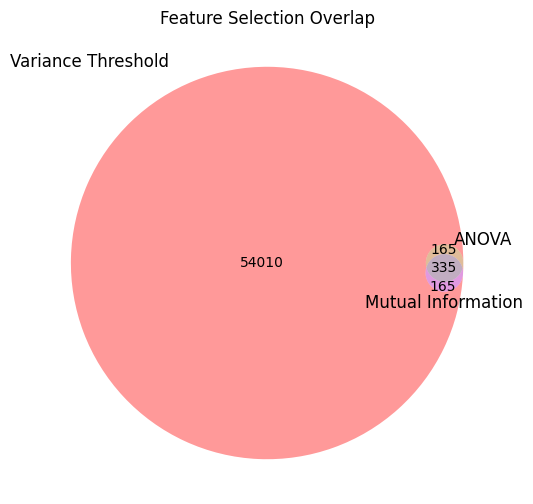

In [17]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  

# Convert numpy arrays to flattened lists for compatibility
variance_features = set(X_var.ravel())
anova_features = set(X_anova.ravel())
mutual_info_features = set(X_mut.ravel())

# Create a Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn_diagram = venn3(
    subsets=(
        len(variance_features - anova_features - mutual_info_features),  # Only Variance
        len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
        len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
        len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
        len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
        len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
        len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
    ),
    set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
)
plt.title("Feature Selection Overlap")
plt.show()
